# Mathematical Underpinnings - Lab 4

In [5]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

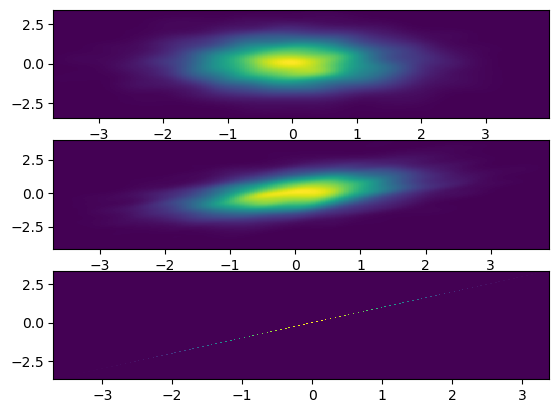

In [4]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [9]:
n = 5000
cors = [0, 0.5, 1]
data = []
for cor in cors:
    data.append(np.random.multivariate_normal(np.zeros(2), np.array([[1, cor], [cor, 1]]), n))

In [12]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

for i, cor in enumerate(cors):
    df = data[i]
    print(f'Correlation: {cor}')
    print(f'Pearson correlation: {pearsonr(df[:,0], df[:,1])}')
    X_dis = pd.cut(df[:,0], bins=10, labels=False)
    Y_dis = pd.cut(df[:,1], bins=10, labels=False)
    print(f'Mutual information: {mutual_info_score(X_dis, Y_dis)}')
    print('---------------------------')
    

Correlation: 0
Pearson correlation: PearsonRResult(statistic=0.0028871199212508643, pvalue=0.8382756752540722)
Mutual information: 0.0075190304206277266
---------------------------
Correlation: 0.5
Pearson correlation: PearsonRResult(statistic=0.5024296074891829, pvalue=3.97373e-318)
Mutual information: 0.13953667072925197
---------------------------
Correlation: 1
Pearson correlation: PearsonRResult(statistic=1.0, pvalue=0.0)
Mutual information: 1.6963578618791648
---------------------------


#### bp 3)

In [24]:
rhos = np.linspace(0, 1, 11)
n = 1000
N = 100

cor_pearson_results = []
mi_results = []

for rho in rhos:
    temp_cor_pearson_results = []
    temp_mi_results = [] 
    for i in range(N):
        df = np.random.multivariate_normal(np.zeros(2), np.array([[1, rho], [rho, 1]]), n)

        temp_cor_pearson_results.append(pearsonr(df[:,0], df[:,1])[0])

        X_dis = pd.cut(df[:,0], bins=10, labels=False)
        Y_dis = pd.cut(df[:,1], bins=10, labels=False)
        temp_mi_results.append(mutual_info_score(X_dis, Y_dis))
        
    cor_pearson_results.append(np.mean(temp_cor_pearson_results))
    mi_results.append(np.mean(temp_mi_results))

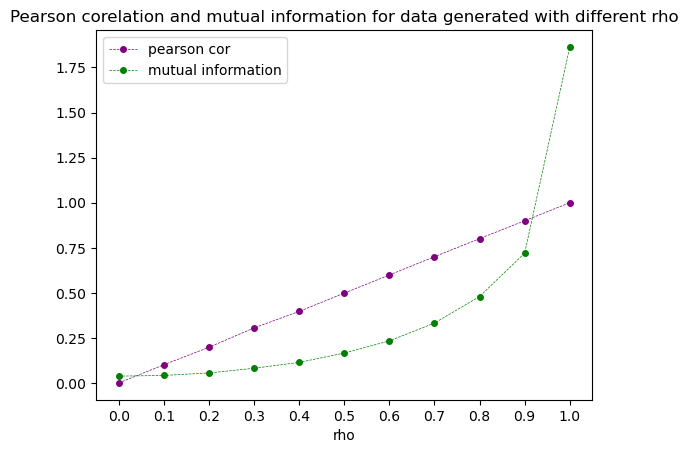

In [32]:
plt.plot(rhos, cor_pearson_results, label='pearson cor', c='purple', linestyle='--', linewidth=0.5, marker='o', markersize=4)
plt.plot(rhos, mi_results, label='mutual information', c='green', linestyle='--', linewidth=0.5, marker='o', markersize=4)
plt.legend()
plt.xticks(rhos)
plt.title('Pearson corelation and mutual information for data generated with different rho')
plt.xlabel('rho')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

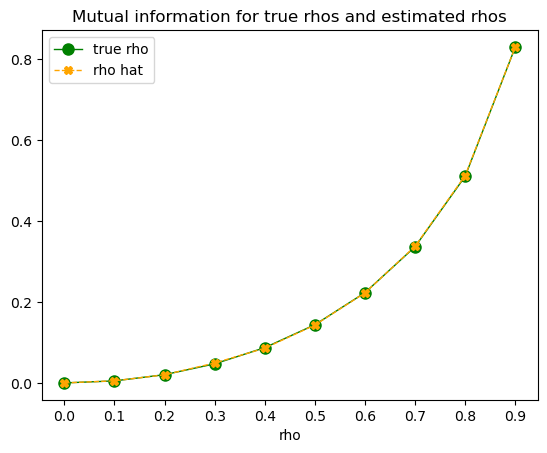

In [51]:
true_rho_mi = -np.log(1 - rhos[:-1]**2)/2
person_rho_mi = -np.log(1 - np.array(cor_pearson_results[:-1])**2)/2

plt.plot(rhos[:-1], true_rho_mi, label='true rho', c='green', linestyle='-', linewidth=1, marker='o', markersize=8)
plt.plot(rhos[:-1], person_rho_mi, label='rho hat', c='orange', linestyle='--', linewidth=1, marker='X', markersize=6)
plt.legend()
plt.xticks(rhos[:-1])
plt.title('Mutual information for true rhos and estimated rhos')
plt.xlabel('rho')
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

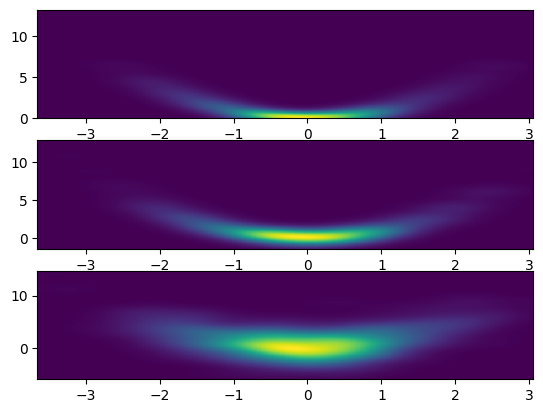

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [53]:
sigmas = np.linspace(0, 2, 21)
n = 1000
N = 100

cor_pearson_results = []
mi_results = []
for sigma in sigmas:
    temp_cor_pearson_results = []
    temp_mi_results = [] 
    for i in range(N):
        X = np.random.normal(0, 1, n)
        Y = X**2 + np.random.normal(0, sigma, n)

        temp_cor_pearson_results.append(pearsonr(X, Y)[0])

        X_dis = pd.cut(X, bins=10, labels=False)
        Y_dis = pd.cut(Y, bins=10, labels=False)
        temp_mi_results.append(mutual_info_score(X_dis, Y_dis))
        
    cor_pearson_results.append(np.mean(temp_cor_pearson_results))
    mi_results.append(np.mean(temp_mi_results))

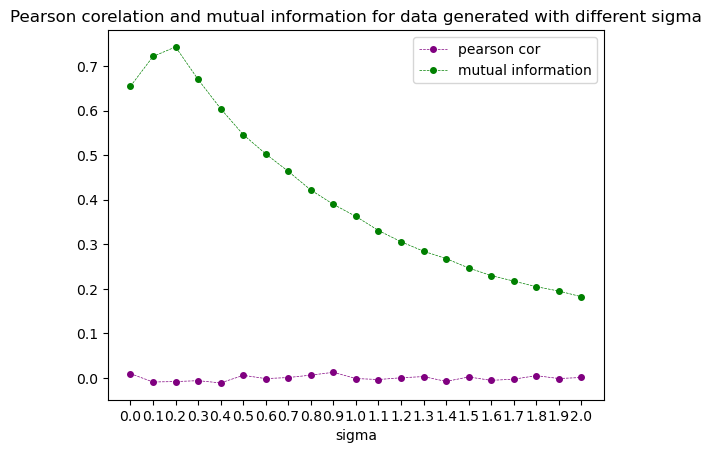

In [57]:
plt.plot(sigmas, cor_pearson_results, label='pearson cor', c='purple', linestyle='--', linewidth=0.5, marker='o', markersize=4)
plt.plot(sigmas, mi_results, label='mutual information', c='green', linestyle='--', linewidth=0.5, marker='o', markersize=4)
plt.legend()
plt.xticks(sigmas)
plt.title('Pearson corelation and mutual information for data generated with different sigma')
plt.xlabel('sigma')
plt.show()

## Task 2

### a)

In [69]:
def indep_test_asymptotic(X, Y, stat):
    if stat == "mi":
        stat_value = 2 * len(X) * mutual_info_score(X, Y)

    if stat == "chi2":
        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1) * (len(np.unique(Y)) - 1)
    p_value = 1 - chi2.cdf(stat_value, df=df)
    
    return stat_value, p_value

### b)

In [60]:
def indep_test_permutation(X, Y, B):
    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2 * len(X) * stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [77]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
n = 1000
X, Y = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n).T
X_dis = pd.cut(X, bins=10, labels=False)
Y_dis = pd.cut(Y, bins=10, labels=False)

In [78]:
print(f'Asymptotic test of independence with mutual information:')
stat_value, p_value = indep_test_asymptotic(X_dis, Y_dis, 'mi')
print(f'statistic value: {stat_value}, p-value: {p_value}')
print(f'Asymptotic test of independence with chi2:')
stat_value, p_value = indep_test_asymptotic(X_dis, Y_dis, 'chi2')
print(f'statistic value: {stat_value}, p-value: {p_value}')
print(f'Permutation test of independence:')
stat_value, p_value = indep_test_permutation(X_dis, Y_dis, 50)
print(f'statistic value: {stat_value}, p-value: {p_value}')

Asymptotic test of independence with mutual information:
statistic value: 69.54931615056306, p-value: 0.8140371741591776
Asymptotic test of independence with chi2:
statistic value: 69.50109543384852, p-value: 0.8151583515106999
Permutation test of independence:
statistic value: 69.54931615056306, p-value: 0.8235294117647058


p-value is close to 1, therefore there is no reason to reject null hypothesis

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [79]:
# independent r.v. - ideally we will reject the null hypothesis
n = 1000
X, Y = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.3], [0.3, 1]]), n).T
X_dis = pd.cut(X, bins=10, labels=False)
Y_dis = pd.cut(Y, bins=10, labels=False)

In [80]:
print(f'Asymptotic test of independence with mutual information:')
stat_value, p_value = indep_test_asymptotic(X_dis, Y_dis, 'mi')
print(f'statistic value: {stat_value}, p-value: {p_value}')
print(f'Asymptotic test of independence with chi2:')
stat_value, p_value = indep_test_asymptotic(X_dis, Y_dis, 'chi2')
print(f'statistic value: {stat_value}, p-value: {p_value}')
print(f'Permutation test of independence:')
stat_value, p_value = indep_test_permutation(X_dis, Y_dis, 50)
print(f'statistic value: {stat_value}, p-value: {p_value}')

Asymptotic test of independence with mutual information:
statistic value: 145.72981645965496, p-value: 1.3837159414276101e-05
Asymptotic test of independence with chi2:
statistic value: 175.57045958537853, p-value: 6.081882886199708e-09
Permutation test of independence:
statistic value: 145.72981645965496, p-value: 0.0196078431372549


p-value is less than 0.05, so we reject the null hypothesis